<h1>Crecimiento de árboles: un ejemplo usando lme

La altura ( ), en pies (los datos son de EE. UU.) y la edad, en años, se registran para 14 árboles individuales. Un factor variable Semilla ( ),con 14 niveles, indica la identidad de los árboles individuales

$$ height_{ji}=β_0+β_1age_{ji}+β_2age^2_{ji}+β_3age^3_{ji}+b_0+b_{j1}age_{ji}+b_{j2}age^2_{ji}+b_{j3}age^3_{ji}+ε_{ji} $$

$β$ denota los efectos fijos y $b$ denota los efectos aleatorios

In [2]:
library(nlme)
data(Loblolly)

#head(Loblolly, 10)
Loblolly[1:5, 1:3]

,height,age,Seed
,<dbl>,<dbl>,<ord>
1,4.51,3,301
15,10.89,5,301
29,28.72,10,301
43,41.74,15,301
57,52.70,20,301


 centrar la variable edad

In [3]:
Loblolly$age <- Loblolly$age - mean(Loblolly$age)

produce una lista de control en la que el número de iteraciones EM se establece en 500 y <br>el número máximo de iteraciones Newton se establece en 100

- `niterEM=500`: Esto establece el número máximo de iteraciones para el algoritmo EM (Expectation-Maximization) que se utiliza en la fase inicial de la optimización. El algoritmo EM es un método iterativo que se utiliza para encontrar estimaciones de máxima verosimilitud en modelos con variables latentes.

- `msMaxIter=100`: Esto establece el número máximo de iteraciones para el algoritmo de optimización que se utiliza en la fase final de la optimización.

El objeto `lmc` que se crea con este código se puede pasar al argumento `control` de la función `lme()` para utilizar estas opciones de control cuando se ajusta el modelo.



In [4]:
lmc <- lmeControl(niterEM=500,msMaxIter=100)

* $( random )$ especifica que debería haber un término cúbicodiferente para cada árbol
* $( correlation )$ especifica un modelo autorregresivo para los residuos de cada árbol 
* $( form =  age|Seed )$ indica que la edad es la variable que determina el orden de los residuos y que la correlación se aplica dentro de las mediciones realizadas en un árbol, pero no entremediciones en diferentes árboles

* Este código está ajustando un modelo lineal mixto (LME) a los datos `Loblolly` utilizando la función `lme()` del paquete `nlme` en R. Aquí está lo que hace cada parte del código:

- `height ~ age + I(age^2) + I(age^3)`: Esta es la fórmula del modelo para los efectos fijos.

- `Loblolly`: Este es el conjunto de datos que se está utilizando para ajustar el modelo.

- `random = list(Seed = ~ age + I(age^2) + I(age^3))`: Es la fórmula del modelo para los efectos aleatorios. Está permitiendo que los coeficientes de `age`, `I(age^2)`, y `I(age^3)` varíen aleatoriamente para cada nivel de `Seed` (semilla).

- `correlation = corAR1(form = ~ age|Seed)`: Esto especifica una estructura de correlación AR(1) (autoregresiva de orden 1) para los residuos dentro de cada nivel de `Seed`. Esto significa que se espera que las observaciones tomadas en edades más cercanas dentro de la misma semilla estén más correlacionadas.

- `control = lmc`: Esto especifica opciones de control para el algoritmo de optimización que se utiliza para ajustar el modelo. `lmc` es un objeto que se debe haber definido previamente con la función `lmeControl()`.

In [5]:
m0 <- lme(height ~ age + I(age^2) + I(age^3),Loblolly,
random = list(Seed = ~ age + I(age^2) + I(age^3)),
correlation = corAR1(form = ~ age|Seed),control=lmc)

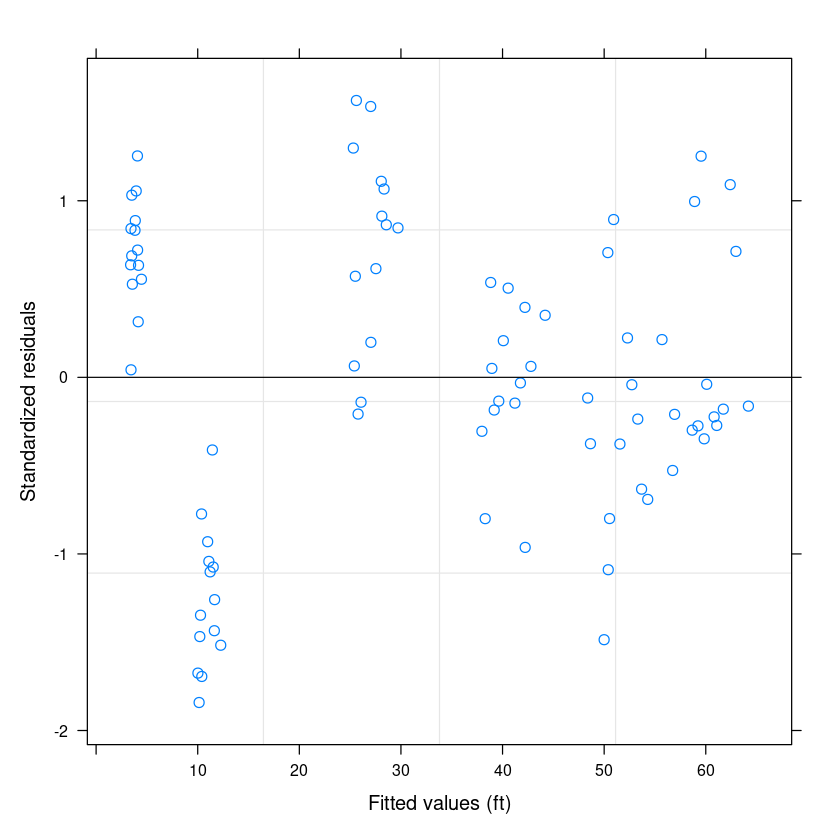

In [6]:
plot(m0)

El gráfico muestra una clara tendencia en la media de los residuos: el modelo parece <br>subestimar el primer grupo de mediciones, realizado a los 5 años, y luego<br> sobreestimar el siguiente grupo, realizado a los 10 años, antes de subestimar algo el siguiente grupo, que corresponde hasta el año 15.<br> Esto sugiere la necesidad de un modelo más flexible, por lo que también se probaron polinomios de cuarto y quinto orden

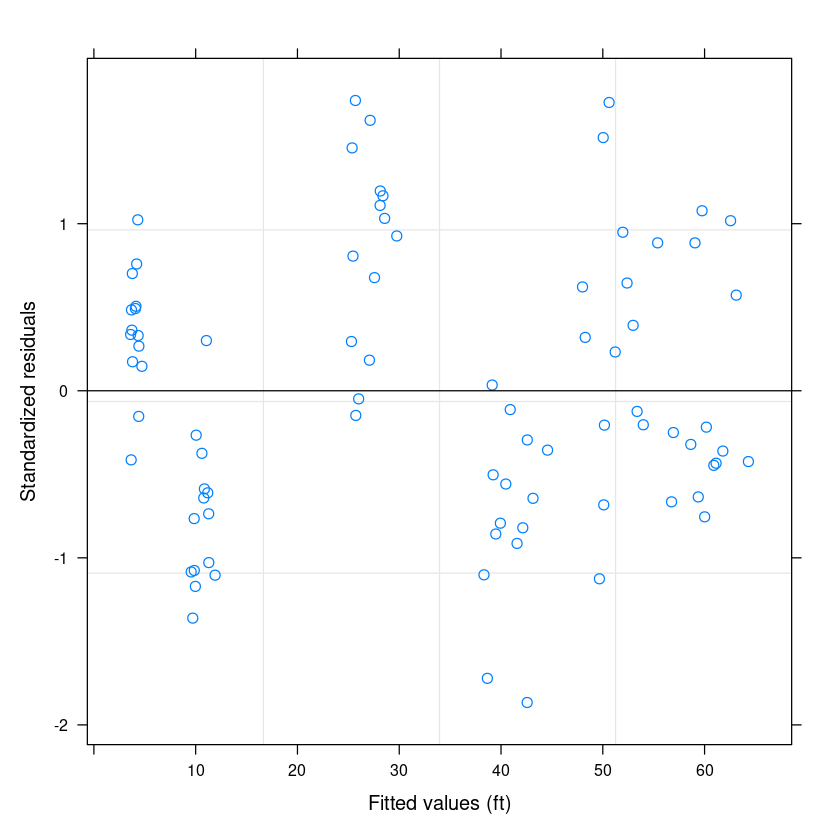

In [7]:
m1 <- lme(height ~ age + I(age^2) + I(age^3) + I(age^4), Loblolly, 
list(Seed = ~ age + I(age^2) + I(age^3)),
cor = corAR1(form = ~age|Seed), control=lmc)

plot(m1)

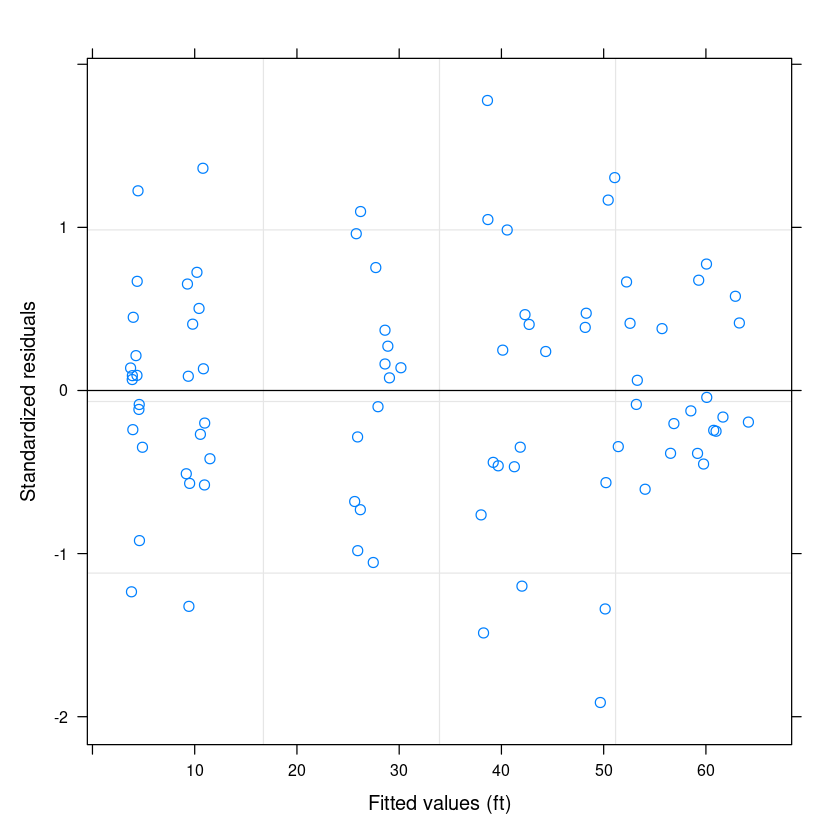

In [8]:
m2 <- lme(height ~ age +I(age^2) +I(age^3) +I(age^4) +I(age^5),Loblolly,
list(Seed = ~ age + I(age^2) + I(age^3)),
cor = corAR1(form = ~ age|Seed), control=lmc)

plot(m2)

Los gráficos de residuos resultantes se muestran una ligera mejora para m1, pero sólo m2 es realmente satisfactorio.<br> Ahora se pueden crear más gráficos de control para m2

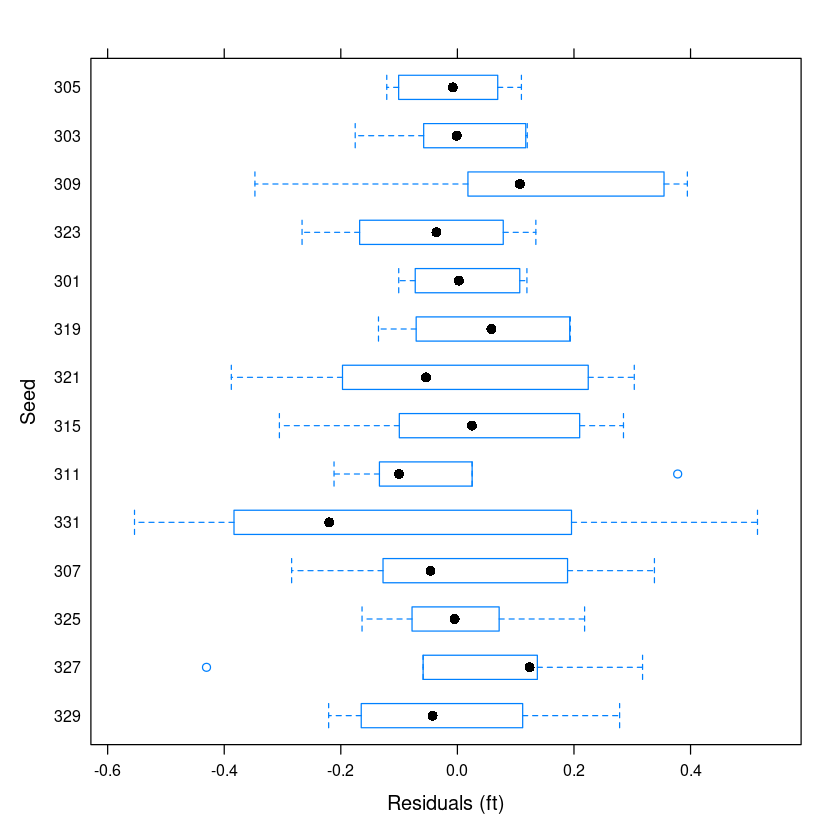

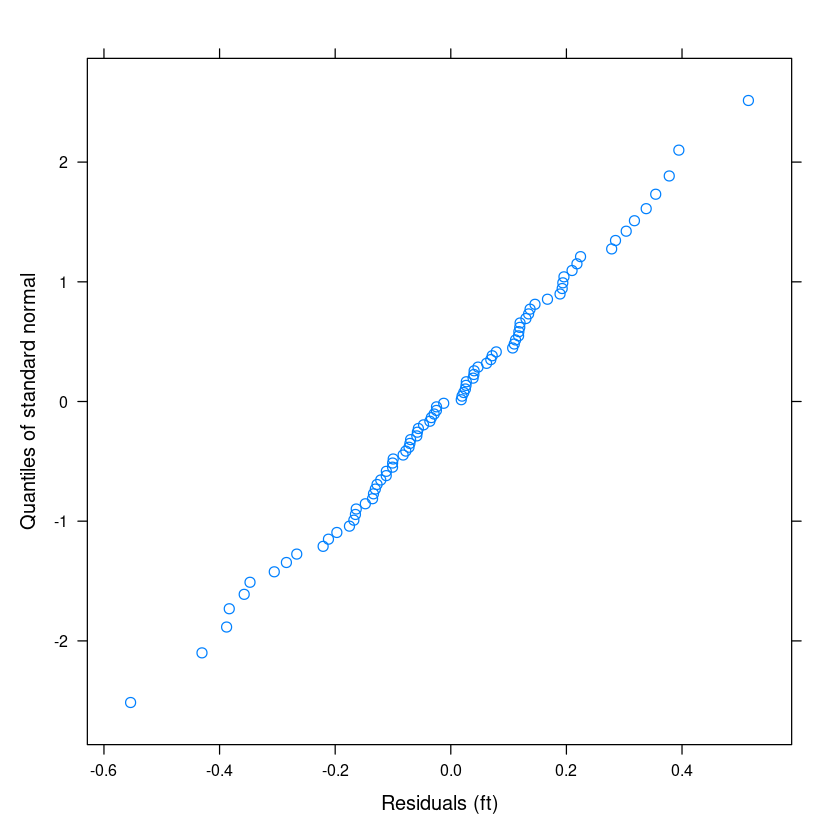

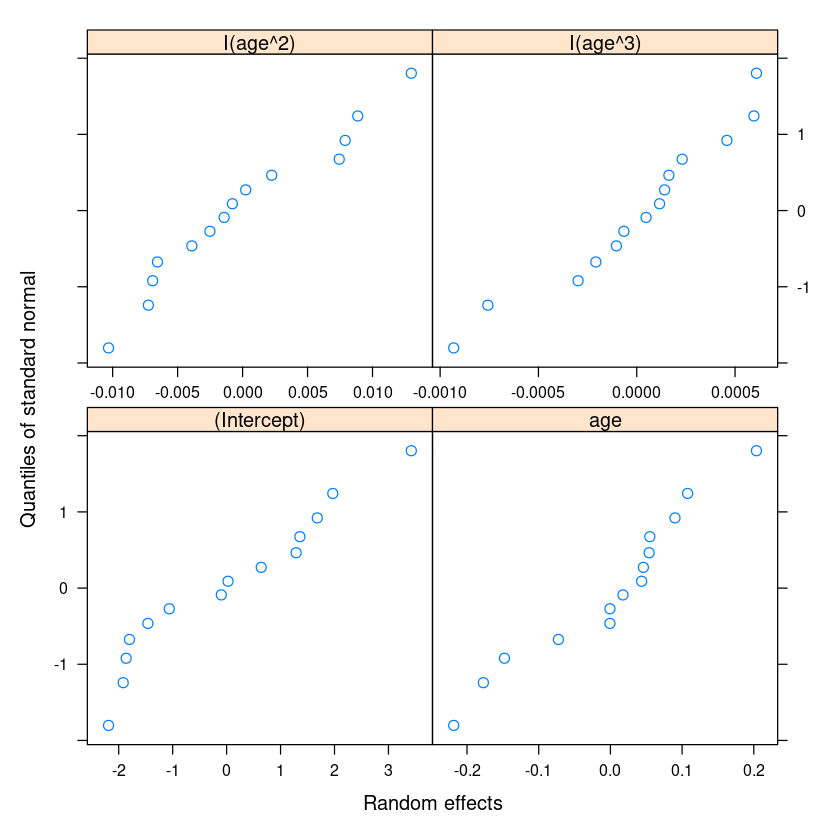

In [9]:
plot(m2,Seed~resid(.))
qqnorm(m2,~resid(.))
qqnorm(m2,~ranef(.))

Una pregunta obvia es si realmente se requiere la elaborada estructura del modelo, con<br>errores cúbicos aleatorios y autocorrelacionados dentro del árbol. Primero intente<br>eliminar el componente de autocorrelación

In [10]:
#m2 <- lme(height ~ age +I(age^2) +I(age^3) +I(age^4) +I(age^5),Loblolly,
#list(Seed = ~ age + I(age^2) + I(age^3)),
#cor = corAR1(form = ~ age|Seed), control=lmc)

m3 <- lme(height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), Loblolly,
          random = list(Seed = ~ age + I(age^2) + I(age^3)), control = lmc)

#lme.formula(fixed= height ~ age +I(age^2) +I(age^3) +I(age^4) +I(age^5), data =Loblolly, 
#          random= list(Seed = ~age+ I(age^2) +I(age^3)), control= lmc)

anova(m3,m2)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
m3,"lme.formula(fixed = height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), data = Loblolly, random = list(Seed = ~age + I(age^2) + I(age^3)), control = lmc)",1,17,250.4616,290.5257,-108.2308,,NA,NA
m2,"lme.formula(fixed = height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), data = Loblolly, random = list(Seed = ~age + I(age^2) + I(age^3)), correlation = corAR1(form = ~age | Seed), control = lmc)",2,18,249.2082,291.6289,-106.6041,1 vs 2,3.253456,0.07127305


El comando anova en realidad está realizando aquí una prueba de razón de verosimilitud<br>generalizada (GLRT), que rechaza m3 a favor de m2. anova también informa el AIC para los<br>modelos, lo que también sugiere que es preferible m2. Parece haber pruebas sólidas de<br>autocorrelación en los residuos dentro de los árboles. 

Quizás el modelo de efectos aleatorios podría simplificarse eliminando la dependencia <br>del crecimiento específico de los árboles del cubo de la edad.

In [11]:
m4 <- lme(fixed= height ~ age +I(age^2) +I(age^3) +I(age^4) +I(age^5), data =Loblolly, 
          random= list(Seed = ~age+ I(age^2)), 
          correlation =corAR1(form =~age | Seed),control = lmc)

anova(m4,m2)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
m4,"lme.formula(fixed = height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), data = Loblolly, random = list(Seed = ~age + I(age^2)), correlation = corAR1(form = ~age | Seed), control = lmc)",1,14,253.7579,286.7519,-112.8790,,NA,NA
m2,"lme.formula(fixed = height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), data = Loblolly, random = list(Seed = ~age + I(age^2) + I(age^3)), correlation = corAR1(form = ~age | Seed), control = lmc)",2,18,249.2082,291.6289,-106.6041,1 vs 2,12.54979,0.01369856


Comparación de puntuaciones AIC (que también podrían haberse obtenido utilizandoAIC(m4,m2)) <br>sugiere enfáticamente que <b>m2 es el mejor modelo</b>

Otro modelo obvio que se puede probar es uno con una estructura de efectos aleatorios<br>menos general. Los modelos hasta ahora han permitido correlacionar los efectos<br>aleatorios de cualquier árbol de una forma general muy restrictiva. Simplemente se ha<br>asumido que $b_j∼N(0,Ψ_θ)$ , donde la única restricción en la matriz $Ψ_θ$ es que debe ser<br>positiva definida. Posiblemente un modelo menos flexible podría ser suficiente. Por<br>ejemplo, $Ψ_θ$  diagonal con elementos positivos. Esta estructura se puede definir con ayuda<br>de la función  $lme$ como:

In [12]:
m5 <- lme(height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), 
          data = Loblolly,
          random = list(Seed = pdDiag(~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5))),
          control = lmc)

Aquí la función $pdDiag$ indica que la matriz de covarianza para los efectos aleatorios en <br>
cada nivel de debe tener una estructura diagonal (definida positiva).$m5$ se puede <br>
comparar con $m2$.

In [13]:
anova(m2,m5)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
m2,"lme.formula(fixed = height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), data = Loblolly, random = list(Seed = ~age + I(age^2) + I(age^3)), correlation = corAR1(form = ~age | Seed), control = lmc)",1,18,249.2082,291.6289,-106.6041,,NA,NA
m5,"lme.formula(fixed = height ~ age + I(age^2) + I(age^3) + I(age^4) + I(age^5), data = Loblolly, random = list(Seed = pdDiag(~age + I(age^2) + I(age^3) + I(age^4) + I(age^5))), control = lmc)",2,13,294.5556,325.1928,-134.2778,1 vs 2,55.34746,1.10723e-10


Nuevamente, tanto la prueba GLRT como la comparación AIC favorecen el modelo más<br>general m2. En este caso se cumplen los supuestos GLRT: m5 equivale a establecer las<br>covarianzas de los efectos aleatorios en m2 en cero, pero como las covarianzas pueden ser<br>positivas o negativas, esto no está en el límite del espacio de parámetros y los supuestos<br>GLRT se cumplen.